In [1]:
cd /Users/joepalmo/Desktop/cfa/SDU-preproc

/Users/joepalmo/Desktop/cfa/SDU-preproc


In [2]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from astropy.io import ascii
import os

# open source module found for converting MJD/JD to DateTimes
import jdutil as jd

# Ben's module -- THANKS BEN
import LCtools

# my preprocessing module
from preproc import *

import glob


In [49]:
# specify path to the lightcurve and spectrum
lc_path = "TDSS_data/EB_LC_ZTFr.csv"
spec_path = "TDSS_data/EB_spec.csv"

# object name (or abbreviation)
n = "EB"

# resample length for time-sorted LC purposes
resample_len = '1h'

In [50]:
#load into pandas dataframes
lc = pd.read_csv(lc_path)
spec = pd.read_csv(spec_path)

time_preproc_lc = LC_timesort_preproc(lc, resample_len=resample_len)
phase_preproc_lc = LC_phasesort_preproc(lc, bins=phase_bins())
phasefit_preproc_lc = LC_phasefit_preproc(lc_path, bins=phase_bins())
preproc_spec = spectra_preproc(spec, bins=wavelength_bins())

#create output directory
outdir = 'preproc/{}/'.format(n)
if not os.path.exists(outdir):
    os.makedirs(outdir)   

# Period in Days

In [51]:
#load data into astropy table, sort by mjd, and remove phase
data = ascii.read(lc_path, format='csv', fast_reader=False)
data.sort('mjd')
data.remove_column('phase')

#Use LombScargle periodogram to find the best fit period (in days)
omega = LCtools.perdiodSearch(data)[0]['P'] 

print("The period is", omega, "days")

The period is 0.2789042410178889 days


# Raw Light Curve Exploration

In [52]:
print("The observations span",str(round(lc.mjd.max()-lc.mjd.min(), 2)),"days")

The observations span 594.67 days


In [53]:
len(lc)

452

# Time Sorted Light Curve

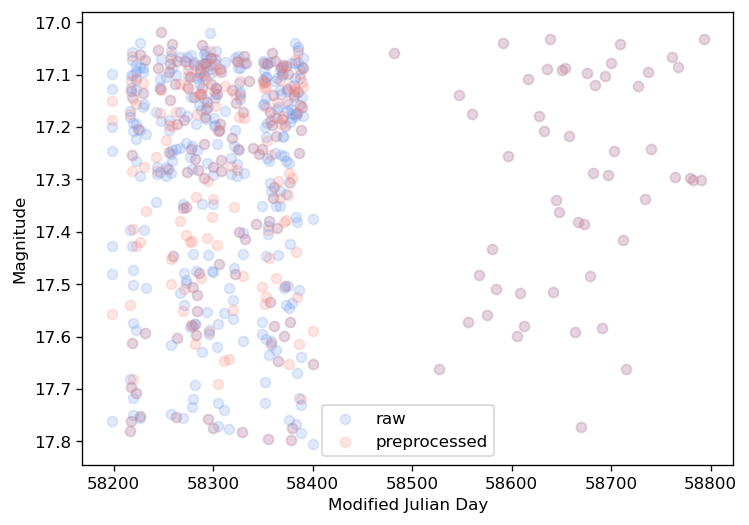

In [54]:
fig1 = plot_timesort(lc, time_preproc_lc)

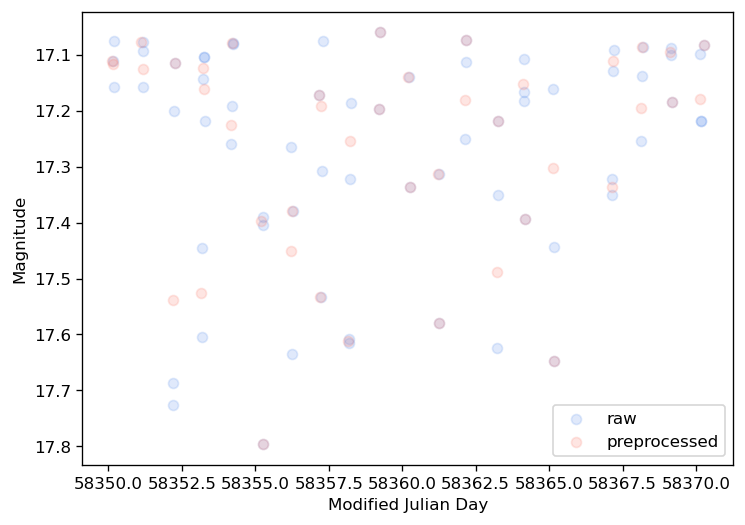

In [72]:
fig1 = plot_timesort(lc, time_preproc_lc, start=58350, end=58371)

In [66]:
len(time_preproc_lc[time_preproc_lc['Modified Julian Day'].between(58350, 58371)])

505

In [67]:
len(time_preproc_lc[time_preproc_lc['Modified Julian Day'].between(58350, 58371)].dropna())

42

In [68]:
time_preproc_lc_final = time_preproc_lc[time_preproc_lc['Modified Julian Day'].between(58350, 58371)]

In [73]:
len(lc[lc['mjd'].between(58350, 58371)])

67

In [74]:
# percent of the data taken during this one night:
len(lc[lc['mjd'].between(58350, 58371)]) / len(lc) * 100

14.823008849557523

Binning to 36 hours doesn't seem to mask any important variability artifacts from the light curve, it only muffles small scale variability   

In [75]:
# The average data play rate determined empirically from sonoUno is about 
# 8.5 data rows played per second. Therefore:
print("Estimated video time of "+ str(len(time_preproc_lc_final) / 8.5), "s")

Estimated video time of 59.411764705882355 s


# Save Preprocessed File

In [76]:
#save preprocessed files
time_preproc_lc_final.to_csv("preproc/{}/{}_LC_timesort.csv".format(n,n), index=False)
phase_preproc_lc.to_csv("preproc/{}/{}_LC_phasesort.csv".format(n,n), index=False)
phasefit_preproc_lc.to_csv("preproc/{}/{}_LC_phasefit.csv".format(n,n), index=False)
preproc_spec.to_csv("preproc/{}/{}_spec.csv".format(n,n), index=False)